# Importing Libraries

In [1]:
import tensorflow as tf        #open source library for neural networks
import tensorflow_hub as hub   #repository for ready to deploy trained ML models
import pandas as pd            #data analysis and manipulation tool
import seaborn as sns          #data visualization tool library based on matplotlib
import numpy as np             #array based library
%matplotlib inline  
from sklearn.model_selection import train_test_split   #to split data into random train and test subsets

In [2]:
print("Version: ", tf.__version__) #To check tensorflow version

Version:  2.9.2


# Importing Dataset

In [3]:
csv = pd.read_csv("/content/drive/MyDrive/Data DSMLAI/5000 comments datset.csv",delimiter=",",encoding_errors='ignore') # loading the CSV file from the google drive
# DataFrame with only "Comment" and "Spam" columns
df = csv[["Comment", "Spam"]]
# Remove all comments that have no ratings //df = df.dropna()// (In this dataset the comments are all taged as I prepared the dataset myself)
df  #printing

,Comment,Spam
0,&lt;????i make my first million investing in f...,1
1,&lt;?l will forever be indebted to you I will ...,1
2,<b>????I recommend a professional forex/Bitcoi...,1
3,I think Im blessed because if not I wouldnt ha...,1
4,<b>I recommend a professional broker to you g...,1
...,...,...
4995,She is so beautiful!,0
4996,3 seconds in and I want to marry her. I am goi...,0
4997,She talks a lot like Tanmay Bakshi,0
4998,Why does her face look like a bad deepfake?,0


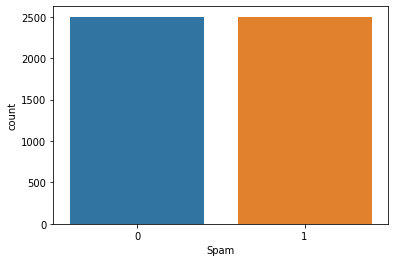

In [4]:
sns.countplot(x="Spam",data=df) #plot from data frame using seaborn library

# Importing fuctions for Processing and Mechanics

In [5]:
# For text mechanics
from tensorflow.keras.preprocessing.sequence import pad_sequences #help transform seqence of integer into 2d numpy array
from tensorflow.keras.preprocessing.text import Tokenizer #help turn each text into sequence pf integers

# For Model mechanics
from tensorflow.keras.models import Sequential #to help arranging keras layers into a sequential order
from tensorflow.keras.layers import Dense #regular connected NN layer
from tensorflow.keras.layers import Flatten  #to flatten the input but doesnt affect the batch size
from tensorflow.keras.layers import Dropout   #rehularization technique to reduce overfittting by randomly leaving neurons
from tensorflow.keras.layers import Embedding  #turn integers to dense vectors for 1st layer
from tensorflow.keras.callbacks import EarlyStopping  # early stop if the growth has been slowed down... helps in reducing overfitting

# importing train test split from scikit learn
from sklearn.model_selection import train_test_split

## Splitting Train and Test

In [6]:
x = df['Comment'].values #stpring numpy representation pf dataframe in a variable
y = df['Spam'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) #using four variables to store the train and test test size is how much times of total data we will use for testing, while random state defines the randomness
    
print(len(x_train)) #printing length of train and test datsets
print(len(x_test))

4000
1000


# Model Building

In [7]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2" #using pre trained model for text embedding 
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True) #using a hub keras layer which is trainable and passes string as an inpt and throws tokens as output

model = tf.keras.Sequential() #sequencing the layers
model.add(hub_layer) #adding hub layers
model.add(tf.keras.layers.Dense(16, activation='relu')) #using 16 dense layers for training and learning purposes relu is the activation function
#relu- rectified linear unit activation
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #using 1 dense layer for output purposes

print(model.summary()) #printing the model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________
None


# Model Training and Fitting

In [8]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) #Defining early stopping and the parameters

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) #Model training and parameters

model.fit(x_train,
         y_train,
         epochs=40,
         batch_size=512,
         validation_data=(x_test, y_test),
         verbose=1,
         callbacks=[early_stop]) #fitting of the model on our dataset

Epoch 1/40
8/8 [==============================] - 4s 317ms/step - loss: 0.6788 - accuracy: 0.5845 - val_loss: 0.6383 - val_accuracy: 0.7050
Epoch 2/40
8/8 [==============================] - 2s 253ms/step - loss: 0.6143 - accuracy: 0.7362 - val_loss: 0.5924 - val_accuracy: 0.7840
Epoch 3/40
8/8 [==============================] - 2s 257ms/step - loss: 0.5591 - accuracy: 0.8202 - val_loss: 0.5462 - val_accuracy: 0.8300
Epoch 4/40
8/8 [==============================] - 2s 256ms/step - loss: 0.5024 - accuracy: 0.8685 - val_loss: 0.5002 - val_accuracy: 0.8420
Epoch 5/40
8/8 [==============================] - 2s 254ms/step - loss: 0.4468 - accuracy: 0.8913 - val_loss: 0.4583 - val_accuracy: 0.8500
Epoch 6/40
8/8 [==============================] - 2s 255ms/step - loss: 0.3953 - accuracy: 0.9080 - val_loss: 0.4210 - val_accuracy: 0.8550
Epoch 7/40
8/8 [==============================] - 2s 254ms/step - loss: 0.3487 - accuracy: 0.9175 - val_loss: 0.3903 - val_accuracy: 0.8560
Epoch 8/40
8/8 [====

# Testing on Examples

In [11]:
exam = [
    # From dataset
    "I recommend a professional Forex trading broker to you guys sometime ago, can I get person who invested with her <br>Comment below",
    
    # New spam
    "I’m so happy I met Mark on Insta he help me recover my lost Erc20 sent to a wrong network I’m so happy because his trusted and reliable"
    "This is wonderful and unbelievable just got my Bitcoin account back through Doavercracks on ig thanks a lot really appreciate it.",
    "I recommend y’all to Doavercracks on IG.",
    "BTC price to volatiles swing, making it historically popular for traders to speculate on. According to bitcoin having cycles, there should be at least other four months in this bull run, so, if the Pi indicator (and bitcoin) might repeat a similar bull run to 2013,that would mean a local top relatively close in time and then another top to end the bull run towards mid year, investor's and trader's find it difficult to decide how best to utilize the current market, holding is profitable but trading is far more profitable, I was able to grasp knowledge of trading crypto assets earlier enough, I didn't think it was possible to make constant win from trading till I come across Mrs milly program for investor's and newbies who lack understanding on how trading BTC works, to help them stack up more bitcoin, since late last year till date I have made over 19BTC from 2.6BTC with Mrs milly's help, you can easily get to her with this WhatsApp number +1-2-1-0-8-0-6-4-8-8-9",
    "Never thought it was possible to recover my lost btc until I meet victoolz on insta who helped me...",
    "Can’t recommend him enough for his tireless effort and tremendous job done Doavercracks on IG his truly the best 💯💯",
    "Another 0.05682 bitcoin was recover by this Dude *DANTECHIES* on instagram, I appreciate the work he did for me..",
    "😭😢😭😭 *core_cyber* on Instagram just made me proud, thank you so much sir..",
    
    # Not spam
    "Amazing video!",
    "Maybe to make proof of stake system more democraric we can think about share a certain amount of money the validator get to all the other validators?",
    "I don’t get it 😅😂",
    "Watching this video as El Salvador 🇸🇻 just made bitcoin a legal tender..lol",
    
    # Made up spam
    "Xavier is wonderful, I traded with him and made huge profits",
    "Contact Mr. Decuyper on msgnr for advice"
]

for test in exam:
    out = model.predict([test])
    print("%s - %f - %s" % ("Spam" if out[0] > 0.5 else "Not Spam", out[0], test))
    print()

1/1 [==============================] - 0s 103ms/step
Spam - 0.998503 - I recommend a professional Forex trading broker to you guys sometime ago, can I get person who invested with her <br>Comment below

1/1 [==============================] - 0s 97ms/step
Spam - 0.996134 - I’m so happy I met Mark on Insta he help me recover my lost Erc20 sent to a wrong network I’m so happy because his trusted and reliableThis is wonderful and unbelievable just got my Bitcoin account back through Doavercracks on ig thanks a lot really appreciate it.

1/1 [==============================] - 0s 112ms/step
Spam - 0.829288 - I recommend y’all to Doavercracks on IG.

1/1 [==============================] - 0s 96ms/step
Spam - 0.998954 - BTC price to volatiles swing, making it historically popular for traders to speculate on. According to bitcoin having cycles, there should be at least other four months in this bull run, so, if the Pi indicator (and bitcoin) might repeat a similar bull run to 2013,that would me

In [9]:
#Madhur Agrawal